In [1]:
import skimage
import matplotlib.pyplot as plt
import numpy as np

from skimage.transform import pyramid_gaussian, resize, rescale
from skimage.filters import gaussian

In [6]:
impath = 'C:/Users/anton/Documents/Study/CV2_project/cv2_data/train/images/0006.jpg'
rimg = skimage.io.imread(impath)
img = skimage.color.rgb2lab(rimg)

# LAB channels
Lc = img[:,:,0]
ac = img[:,:,1]
bc = img[:,:,2]

In [3]:
# Gaussian pyramids (center)
l = 4
pLc = list(pyramid_gaussian(Lc, max_layer=l, multichannel=False))
pac = list(pyramid_gaussian(ac, max_layer=l, multichannel=False))
pbc = list(pyramid_gaussian(bc, max_layer=l, multichannel=False))

# Smoothed gaussian pyramids (surround)
s = 2
pLcs = [gaussian(x, sigma=s) for x in pLc]
pacs = [gaussian(x, sigma=s) for x in pac]
pbcs = [gaussian(x, sigma=s) for x in pbc]

# Twin pyramids
onoff_Lc = [(pLc[i] - pLcs[i]).clip(0) for i in range(l + 1)]
onoff_ac = [(pac[i] - pacs[i]).clip(0) for i in range(l + 1)]
onoff_bc = [(pbc[i] - pbcs[i]).clip(0) for i in range(l + 1)]

offon_Lc = [(pLcs[i] - pLc[i]).clip(0) for i in range(l + 1)]
offon_ac = [(pacs[i] - pac[i]).clip(0) for i in range(l + 1)]
offon_bc = [(pbcs[i] - pbc[i]).clip(0) for i in range(l + 1)]

In [4]:
# Sums of pyramide images
onoff_Lc_avg = np.average(np.asarray([resize(x, (180, 320)) for x in onoff_Lc]), axis=0)
offon_Lc_avg = np.average(np.asarray([resize(x, (180, 320)) for x in offon_Lc]), axis=0)

onoff_ac_avg = np.average(np.asarray([resize(x, (180, 320)) for x in onoff_ac]), axis=0)
offon_ac_avg = np.average(np.asarray([resize(x, (180, 320)) for x in offon_ac]), axis=0)

onoff_bc_avg = np.average(np.asarray([resize(x, (180, 320)) for x in onoff_bc]), axis=0)
offon_bc_avg = np.average(np.asarray([resize(x, (180, 320)) for x in offon_bc]), axis=0)

# Feature maps
fLc = np.average(np.asarray([onoff_Lc_avg, offon_Lc_avg]), axis=0)
fac = np.average(np.asarray([onoff_ac_avg, offon_ac_avg]), axis=0)
fbc = np.average(np.asarray([onoff_bc_avg, offon_bc_avg]), axis=0)

# Saliency map
sm = np.average(np.asarray([fLc, fac, fbc]), axis=0)

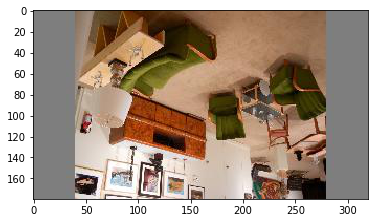

In [8]:
plt.imshow(rimg, cmap='gray')

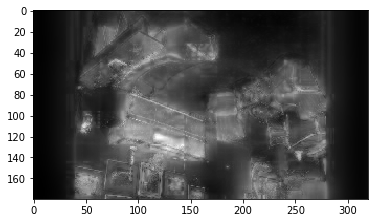

In [5]:
plt.imshow(sm, cmap='gray')